In [1]:
#Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating dataframes

dfi  = pd.read_csv('main.csv')
df1 = pd.read_csv('test1.csv')
df2 = pd.read_csv('test2.csv')
df3 = pd.read_csv('test3.csv')
df4 = pd.read_csv('test4.csv')

In [3]:
# Finding common features in the dataframes

s  = set(list(dfi))
s1 = set(list(df1))
s2 = set(list(df2))
s3 = set(list(df3))
s4 = set(list(df4))
res  = s.intersection(s1)
res1 = res.intersection(s2)
res2 = res1.intersection(s3)
res3 = res2.intersection(s4)
features = list(res3)

In [4]:
# Arranging columns to maintain a uniform order

dfi = dfi.reindex(features,axis=1)
df1 = df1.reindex(features,axis=1)
df2 = df2.reindex(features,axis=1)
df3 = df3.reindex(features,axis=1)
df4 = df4.reindex(features,axis=1)


In [5]:
# Combining all the datasets together

df = pd.concat([dfi,df1,df2,df3,df4])

In [6]:
# Data cleaning

del df['existential there']
del df['interjection']
del df['vi']
del df['score']

df = df.fillna(df.mean())


In [7]:
df

,noun,pronoun,ri,determiner,spelling_mistakes,adverb,adjective,Total_Sentences,cardinal,grammar_errors,word_count_minus_stopwords,verb,modal auxiliary,word_count,preposition,conjunction,Average_Word_Length
0,107.0,19.0,11.94,37.0,1,12.0,31.0,16,1.000000,0,169,27.0,5.000000,312,63.0,10.0,4.830128
1,118.0,24.0,12.60,32.0,0,22.0,15.0,13,2.036728,0,168,36.0,9.000000,328,52.0,20.0,4.393293
2,118.0,24.0,11.85,22.0,0,18.0,20.0,17,6.000000,0,188,55.0,4.000000,364,82.0,15.0,4.497253
3,120.0,10.0,14.32,34.0,0,23.0,31.0,16,1.000000,0,200,44.0,5.000000,363,80.0,15.0,5.041322
4,101.0,22.0,10.45,31.0,0,19.0,12.0,19,2.036728,0,171,55.0,3.000000,311,50.0,18.0,4.524116
5,92.0,8.0,11.69,57.0,0,10.0,26.0,14,2.000000,0,160,42.0,2.000000,307,59.0,9.0,4.413681
6,122.0,34.0,8.04,27.0,0,23.0,17.0,26,3.000000,0,211,58.0,8.000000,364,64.0,8.0,4.456044
7,103.0,29.0,13.75,36.0,3,22.0,13.0,13,2.000000,0,161,37.0,8.000000,326,62.0,14.0,4.503067
8,102.0,36.0,9.33,16.0,0,16.0,22.0,21,2.036728,0,184,59.0,5.000000,325,54.0,15.0,4.526154
9,95.0,11.0,10.94,40.0,0,24.0,18.0,17,1.000000,0,151,49.0,6.000000,306,45.0,17.0,4.480392


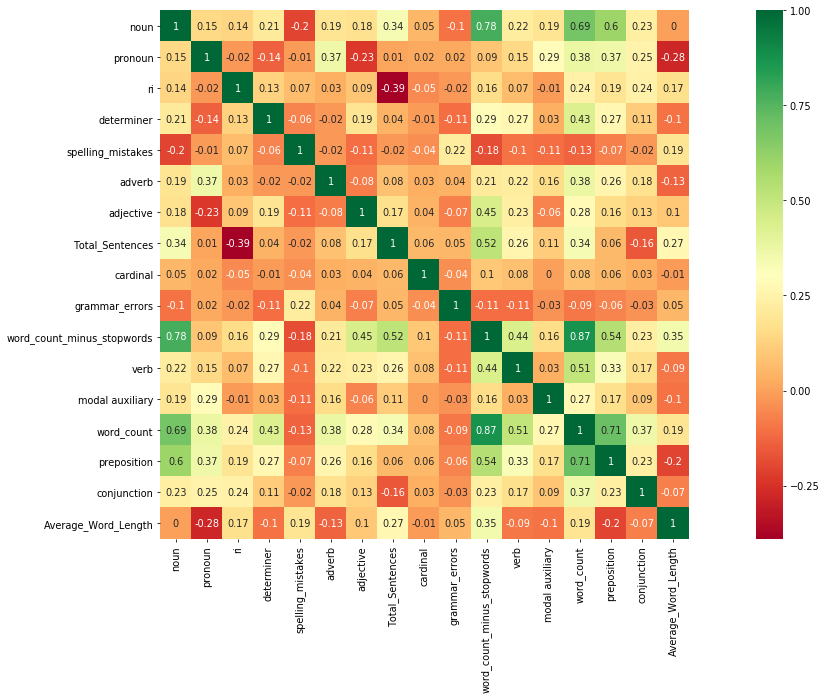

In [8]:
import seaborn as sns
plt.figure(figsize=(25,10), dpi= 70)
sns.heatmap(round(df.corr(),2),square=True,cmap='RdYlGn',annot=True)

In [9]:
# Feature correlation calculation

import operator
Feature_Corr = {}
for i in list(df):
    if(i!='ri'):
        Feature_Corr[i] = abs(df[i].corr(df['ri']))
Feature_Corr_list = sorted(Feature_Corr.items(), key=operator.itemgetter(1))
print(Feature_Corr_list)

[('modal auxiliary', 0.006265362969917822), ('grammar_errors', 0.01848459713327306), ('pronoun', 0.023254719301940213), ('adverb', 0.030498688805730124), ('cardinal', 0.048138939117364395), ('spelling_mistakes', 0.06897764413094445), ('verb', 0.06951833550124706), ('adjective', 0.08582479840416762), ('determiner', 0.13469604422282144), ('noun', 0.13961753367282936), ('word_count_minus_stopwords', 0.15732604224465124), ('Average_Word_Length', 0.16903765309283358), ('preposition', 0.18878125371482346), ('word_count', 0.23831471890915357), ('conjunction', 0.23890032622440324), ('Total_Sentences', 0.39055030457228274)]


Text(0, 0.5, 'Co-relation Values')

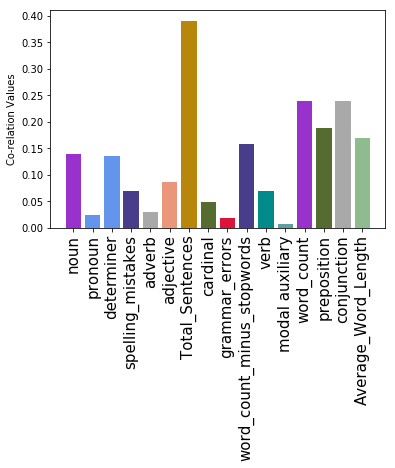

In [10]:
# Correlation with output variable

import random
all_colors = ['burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'cornflowerblue', 'cornsilk', 'crimson', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', ]
c = random.choices(all_colors,k=len(list(df)))
Names = list(df)
Names.remove('ri')
Val = []
for i in Names:
    Val.append(abs(df['ri'].corr(df[i])))
index = np.arange(len(Names))
plt.bar(index,Val,color=c)
plt.xticks(index, Names, fontsize=15, rotation=90)
plt.ylabel("Co-relation Values")

In [11]:
df = df[df['ri']<80]

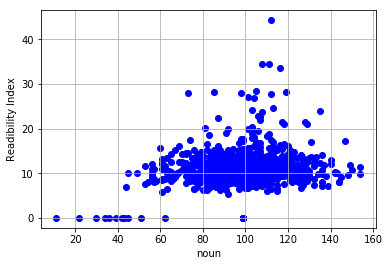

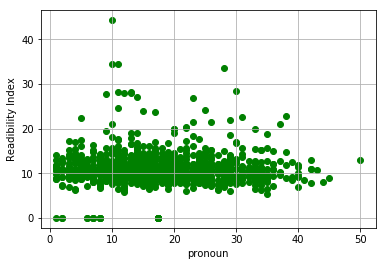

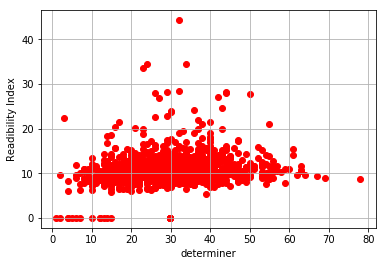

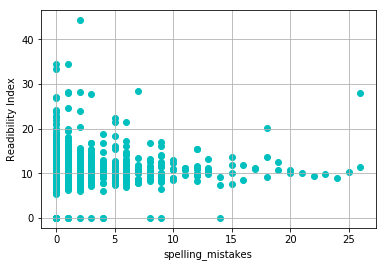

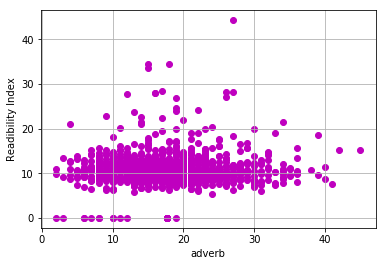

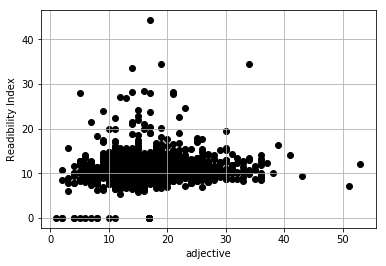

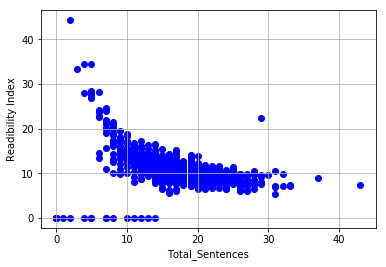

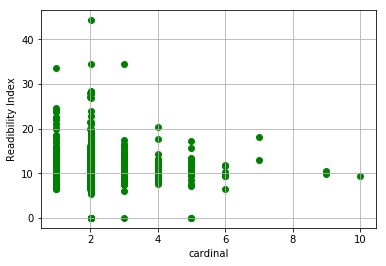

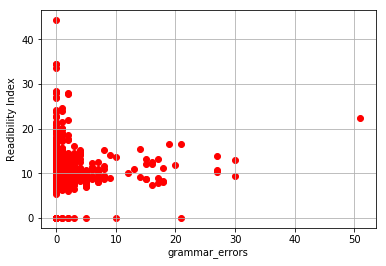

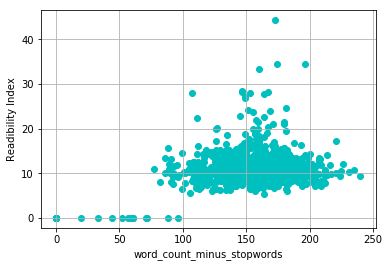

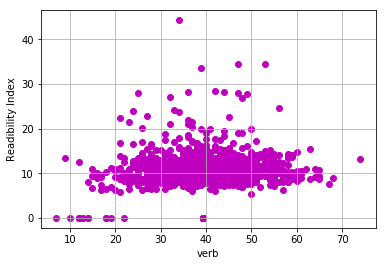

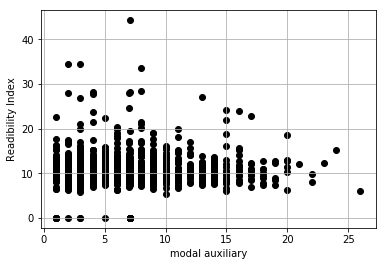

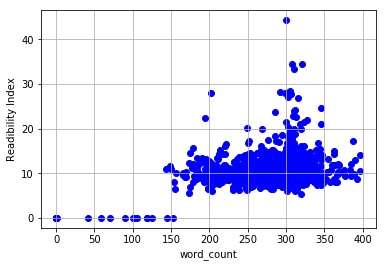

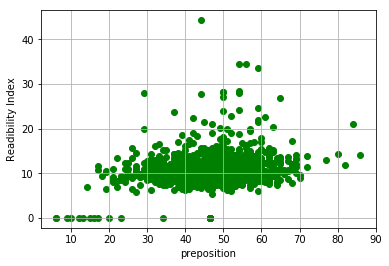

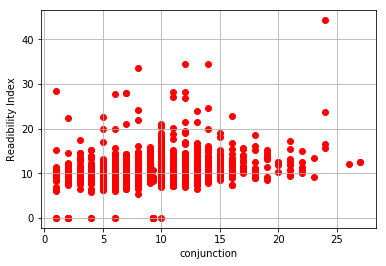

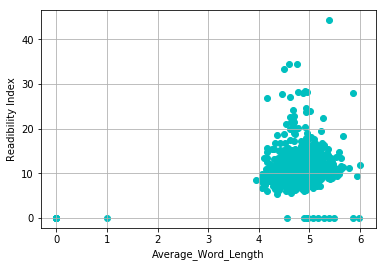

In [12]:
# Visualisation of correlation between features and target

from itertools import cycle
cycol = cycle('bgrcmk')

for i in list(df):
    if(i!='ri'):
        plt.scatter(df[i],df['ri'],c=next(cycol))
        plt.grid(True)
        plt.ylabel('Readibility Index')
        plt.xlabel(i)
        plt.show()

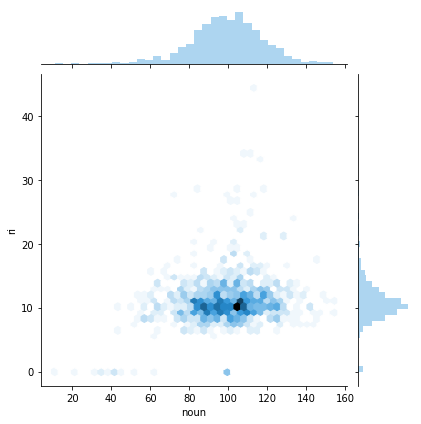

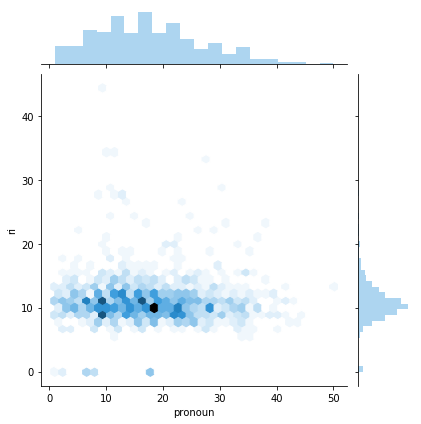

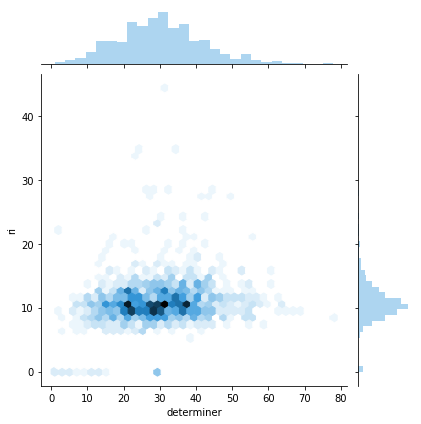

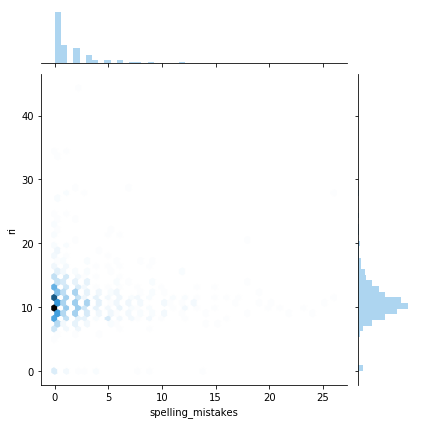

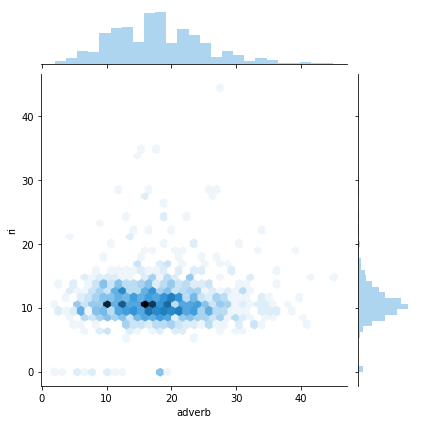

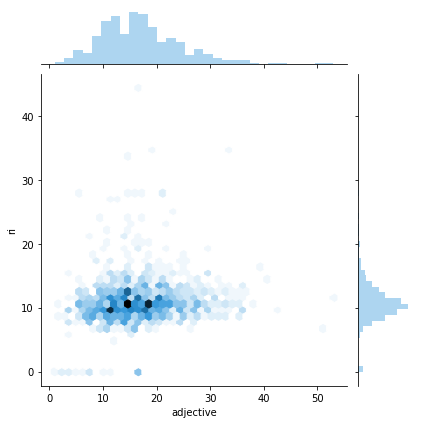

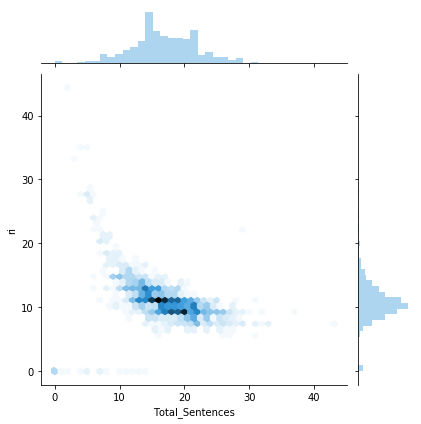

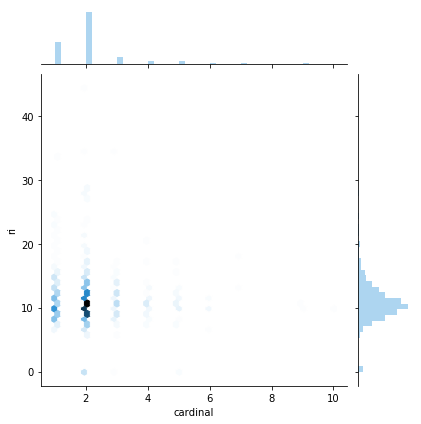

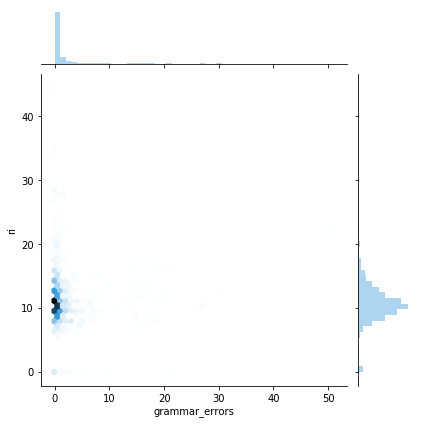

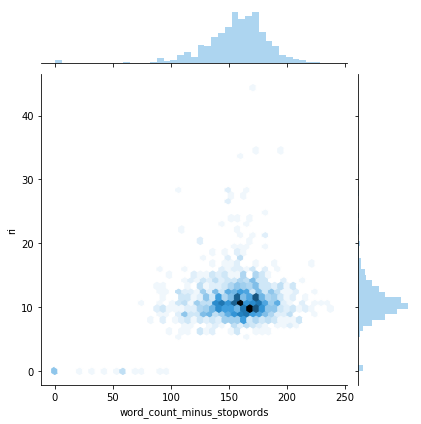

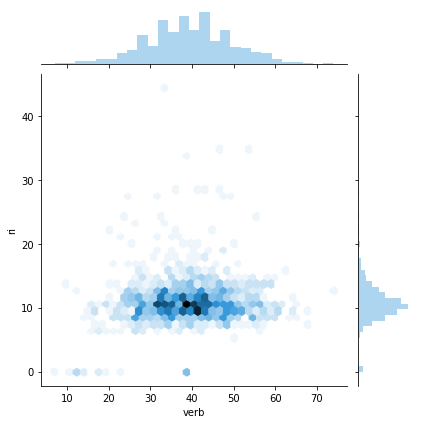

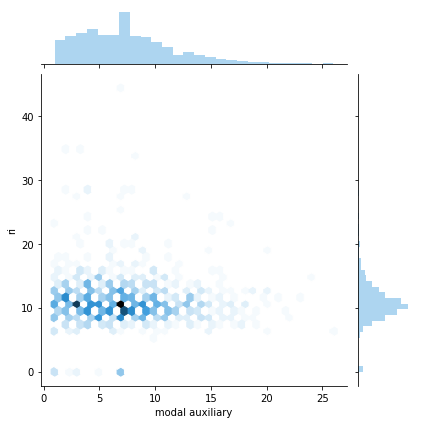

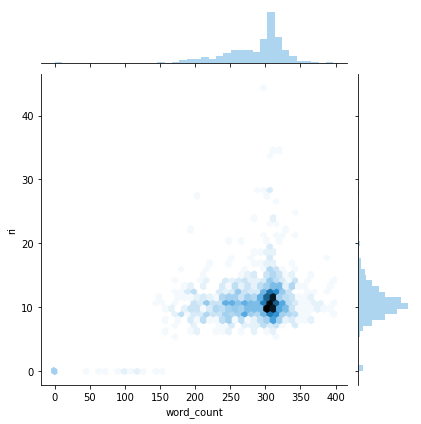

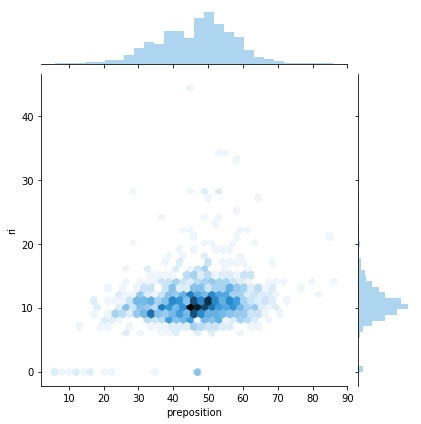

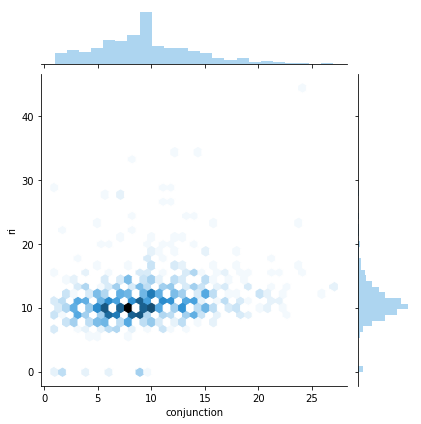

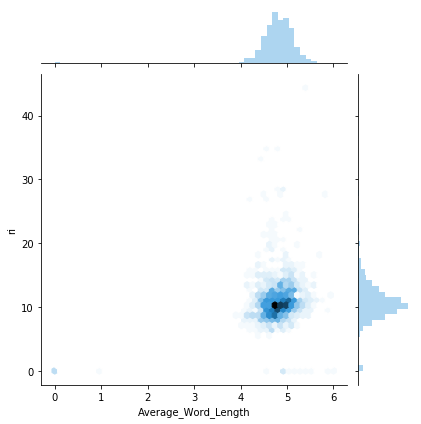

In [13]:
import numpy as np
import seaborn as sns

for i in list(df):
    if(i!="ri"):
        x = df[i]
        y = df['ri']
        sns.jointplot(x, y, kind="hex", color="#3498db")

In [14]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df['Total_Sentences'])
y = df['ri']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred_lin = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 3.9146391807090914


Text(0.5, 1.0, 'Actual V/S Predicted')

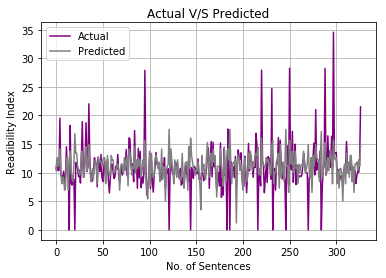

In [15]:
# Predicted and expected Visualisation

L = []
for i in range(len(list(y_pred_lin))):
    L.append(i)
plt.plot(L, y_test, color='purple',label='Actual')
plt.plot(L, y_pred_lin, color='gray',label='Predicted')
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("No. of Sentences")
plt.ylabel("Readibility Index")
plt.title("Actual V/S Predicted")


In [16]:
X = df.drop(['adverb','modal auxiliary','ri'],axis=1)
y = df['ri']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [17]:
# Multi-Variate Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred_mul = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mul))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 2.640413853153756


In [18]:
# R.M.S.E values when considering features
'''
Total Sentences : 3.9146391807090914
    
(Total Sentences,conjunction) : 3.8163312202940642

(Total Sentences,conjunction,word count) : 3.017700344169313

(Total Sentences,conjunction,word count,preposition) : 2.890085129433659

(Total Sentences,conjunction,word count,preposition,avg word length) : 2.7912853017911328

(Total Sentences,conjunction,word count,preposition,avg word length,word count without stop words) : 2.716030216454583

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun) : 2.7039672443363876

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner) : 2.7005764141966915

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective) : 2.698319784732943

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb) : 2.6586360547541754

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes) : 2.6530158309718828

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes,cardinal) :  2.6521173525391313

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes,cardinal,
adverb) : 2.6526242814875953

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes,cardinal,
pronoun) : 2.645789191713105

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes,cardinal,
pronoun,grammar errors) : 2.6404138531537544

(Total Sentences,conjunction,word count,preposition,avg word length,
word count without stop words,noun,determiner,adjective,verb,spelling mistakes,cardinal,
pronoun,grammar errors,modal auxiliary) :  2.6412030818280425

The best RMSE value is : 2.6404138531537544 
#This is obtained by considering all the features except adverb and modal auxiliary '''

'\nTotal Sentences : 3.9146391807090914\n    \n(Total Sentences,conjunction) : 3.8163312202940642\n\n(Total Sentences,conjunction,word count) : 3.017700344169313\n\n(Total Sentences,conjunction,word count,preposition) : 2.890085129433659\n\n(Total Sentences,conjunction,word count,preposition,avg word length) : 2.7912853017911328\n\n(Total Sentences,conjunction,word count,preposition,avg word length,word count without stop words) : 2.716030216454583\n\n(Total Sentences,conjunction,word count,preposition,avg word length,\nword count without stop words,noun) : 2.7039672443363876\n\n(Total Sentences,conjunction,word count,preposition,avg word length,\nword count without stop words,noun,determiner) : 2.7005764141966915\n\n(Total Sentences,conjunction,word count,preposition,avg word length,\nword count without stop words,noun,determiner,adjective) : 2.698319784732943\n\n(Total Sentences,conjunction,word count,preposition,avg word length,\nword count without stop words,noun,determiner,adjecti

Text(0.5, 1.0, 'Actual V/S Predicted')

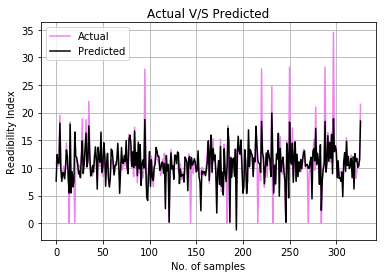

In [19]:
# Predicted and expected Visualisation

L = []
for i in range(len(list(y_pred_mul))):
    L.append(i)
plt.plot(L, y_test, color='violet',label='Actual')
plt.plot(L, y_pred_mul, color='black',label='Predicted')
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("No. of samples")
plt.ylabel("Readibility Index")
plt.title("Actual V/S Predicted")

In [20]:
# K-Nearest-Neighbours

from sklearn import neighbors
from sklearn.metrics import mean_squared_error

rmse_val = []
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(mse)
print("Root Mean Squared Error : {}".format(min(rmse_val)))
print("RMSE value is least for {} Neighbors".format(rmse_val.index(min(rmse_val))+1))


Root Mean Squared Error : 3.063817598840871
RMSE value is least for 6 Neighbors


In [21]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)

Text(0.5, 1.0, 'Actual V/S Predicted')

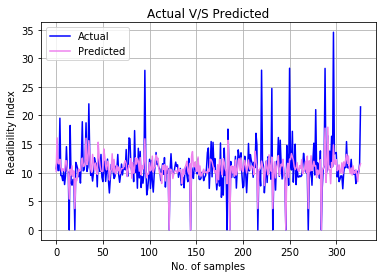

In [22]:
# Predicted and expected Visualisation

L = []
for i in range(len(list(y_pred_knn))):
    L.append(i)
plt.plot(L, y_test, color='blue',label='Actual')
plt.plot(L, y_pred_knn, color='violet',label='Predicted')
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("No. of samples")
plt.ylabel("Readibility Index")
plt.title("Actual V/S Predicted")

In [27]:
# Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0,n_jobs=-1)
model = regr.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error : {}".format(rmse))


/home/krishnapramod/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root Mean Squared Error : 1.8411182830307489


Text(0.5, 1.0, 'Actual V/S Predicted')

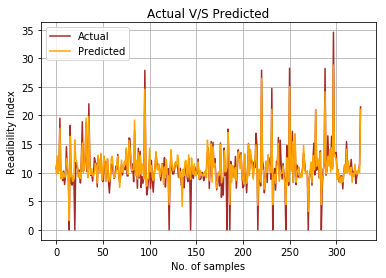

In [28]:
L = []
for i in range(len(list(y_pred))):
    L.append(i)
plt.plot(L, y_test, color='brown',label='Actual')
plt.plot(L, y_pred_rf, color='orange',label='Predicted')
plt.grid(True)
plt.legend(loc="upper left")
plt.xlabel("No. of samples")
plt.ylabel("Readibility Index")
plt.title("Actual V/S Predicted")